# PolyaClassifier cross-species predictions

**Purpose**: To investigate the species-specificity of polyA site predictions using models trained on *S. cerevisiae*, *S. pombe*, *A. thaliana*, and *H. sapiens* data.


In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%run -i notebook_setup.py

## IMPORTS AND SETUP

In [4]:
PROJECT   = "/projects/b1080/eks/polyadenylation/yeast"
OUTDIR    = os.path.join(PROJECT, 'manuscript', 'analysis', 'polyaclassifier_model_cross_species_predictions')
RESOURCES = os.path.join(os.path.dirname(OUTDIR), 'resources')
os.makedirs(OUTDIR, exist_ok = True)


In [5]:
boxplot_format = {
    'boxprops' : {'edgecolor' : 'black', 'linewidth' : 0.5},
    'medianprops' : {'color' : 'black', 'linewidth' : 0.5},
    'whiskerprops' : {'color' : 'black', 'linewidth' : 0.5},
    'capprops' : {'color' : 'black', 'linewidth' : 0.5},
    'flierprops' : {'color' : 'black'},
    'showfliers' : False
}

barplot_format = {
    'color'     : 'lightgray',
    'edgecolor' : 'black',
    'linewidth' : 0.5
}

## HELPER FUNCTIONS

In [6]:
def calculate_cross_species_performance(data_species, data_seed, data_posvar, model_species, model_descriptions):
    
    results = {}
    
    for i,(mspecies,mdesc) in enumerate(zip(model_species,model_descriptions)):
        
        if (mdesc == 'polyaid'):
            pred_col = 'PolyaID_classification'
        else:
            pred_col = 'classification'

        data = pd.read_csv(os.path.join(RESOURCES, f"polyaclassifier_cross_species_predictions.{data_species}_test_data_{data_seed}.pred_by_{mspecies}_{mdesc}.txt"), sep = "\t")
        data['obs_class'] = (data[data_posvar] > 0).astype(int)

        fpr, tpr, thresholds = roc_curve(data['obs_class'], data[pred_col])
        auroc = auc(fpr, tpr)

        prec, rec, thresholds = precision_recall_curve(data['obs_class'], data[pred_col])
        auprc = auc(rec, prec)
        
        results[i] = {
            'model_species': mspecies, 
            'classification_AUROC' : auroc, 
            'classification_AUPRC' : auprc
        }
    
    return pd.DataFrame.from_dict(results, orient = 'index')


In [7]:
def visualize_cross_species_performance(data_species, results):
    
    ## AUROC
    
    fig,ax = plt.subplots(1,1, figsize = (0.3+(0.15*len(results)),1.5))

    sns.barplot(data = results, x = 'model_species', y = 'classification_AUROC', **barplot_format, ax = ax)

    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, va = 'top', ha = 'right')

    ax.set_xlabel("Species of model used for prediction")
    ax.set_ylabel("AUROC")
    
    ax.set_ylim(0.5,1.02)
    ax.yaxis.set_major_locator(MultipleLocator(0.1))

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    plt.savefig(os.path.join(OUTDIR, f'polyaclassifier_cross_species_predictions.{data_species}.auroc.svg'), format = 'svg', dpi = 600)
    plt.show()
    
    ## AUPRC

    fig,ax = plt.subplots(1,1, figsize = (0.3+(0.15*len(results)),1.5))

    sns.barplot(data = results, x = 'model_species', y = 'classification_AUPRC', **barplot_format, ax = ax)

    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, va = 'top', ha = 'right')

    ax.set_xlabel("Species of model used for prediction")
    ax.set_ylabel("AUPRC")
    
    ax.set_ylim(0.5,1.02)
    ax.yaxis.set_major_locator(MultipleLocator(0.1))

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    plt.savefig(os.path.join(OUTDIR, f'polyaclassifier_cross_species_predictions.{data_species}.auprc.svg'), format = 'svg', dpi = 600)
    plt.show()
    
    ## Display data

    print("\nCorresponding data:")
    print(results)
    
    return


## ANALYSIS

### Compile performance metrics for test set predictions made by other species models

In [8]:
scer_data = calculate_cross_species_performance('scer', '12345', 'supporting_reads', ['scer','spom','atha','hsap'], ['bagging3models','bagging3models','bagging3models','polyaid'])
spom_data = calculate_cross_species_performance('spom', '12345', 'supporting_reads', ['scer','spom','atha','hsap'], ['bagging3models','bagging3models','bagging3models','polyaid'])
atha_data = calculate_cross_species_performance('atha', '12345', 'supporting_reads', ['scer','spom','atha','hsap'], ['bagging3models','bagging3models','bagging3models','polyaid'])


### Visualize the differences in AUROC and AUPRC for these predictions

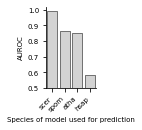

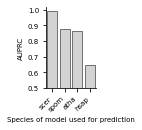


Corresponding data:
  model_species  classification_AUROC  classification_AUPRC
0          scer              0.989145              0.989672
1          spom              0.866901              0.874759
2          atha              0.852279              0.861133
3          hsap              0.584890              0.644978


In [9]:
visualize_cross_species_performance('scer', scer_data)


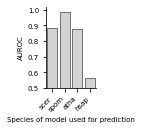

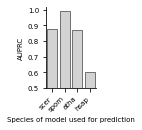


Corresponding data:
  model_species  classification_AUROC  classification_AUPRC
0          scer              0.880751              0.875796
1          spom              0.987903              0.988786
2          atha              0.876967              0.868982
3          hsap              0.561711              0.605372


In [10]:
visualize_cross_species_performance('spom', spom_data)


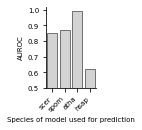

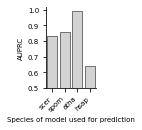


Corresponding data:
  model_species  classification_AUROC  classification_AUPRC
0          scer              0.849648              0.830573
1          spom              0.867477              0.860498
2          atha              0.994226              0.994093
3          hsap              0.621773              0.638798


In [11]:
visualize_cross_species_performance('atha', atha_data)
